## Neural Nets Implementation & XOR Problem

**Goal:** The goal of this exercise is to implement a small neural network from scratch and train it using backprop.

In [8]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [9]:
# Load xor toy dataset
with open('xordata.pkl', 'rb') as f:
    data = pickle.load(f)

X_train = data['X_train'] # 800 training data points with 2 features
y_train = data['y_train'] # training binary labels {0,1}

X_test = data['X_test']
y_test = data['y_test']

In [10]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 2) (800,)
(200, 2) (200,)


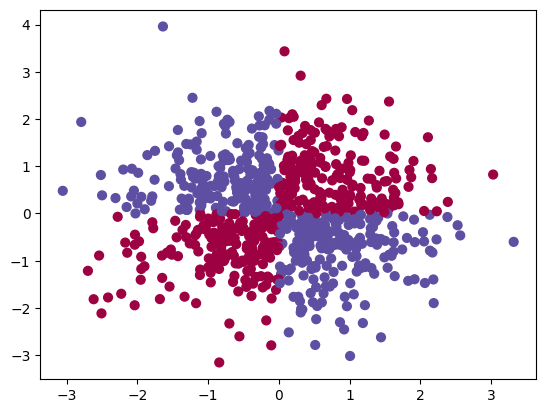

In [11]:
plt.scatter(X_train[:,0], X_train[:,1], s=40, c=y_train, cmap=plt.cm.Spectral)

**In this exercise, do the following:**
1. Implement brackprop to train a two-layer perceptron: an input layer, a hidden layer, and an output layer.
2. The core of the code should include: a forward pass, a backward pass, and weight updates.
3. For input and output layers specify the number of nodes appropriate for the above problem.
4. Randomly initialize the weights and biases of the network.
5. For the hidden layer use ReLU as an activation function and for the output layer use logistic sigmoid.
6. Use cross-entropy loss as the network's loss function and mini-batch SGD as the optimizer.
7. Use cross-validation to estimate performance.
8. Tune the network as you see fit (including number of units in the hidden layer, learning rate,  batch size, number of epochs, etc).
9. Provide a classification report of the performance on the train and test set.
10. Write a summary. Make sure you document your code well.
  
(Optional) You can use sklearn.inspection.DecisionBoundaryDisplay to visualize your decision boundary.

Epoch 0, Loss: 0.7625
Epoch 10, Loss: 1.0311
Epoch 20, Loss: 1.2534
Epoch 30, Loss: 1.4303
Epoch 40, Loss: 1.5794
Epoch 50, Loss: 1.7088
Epoch 60, Loss: 1.8249
Epoch 70, Loss: 1.9306
Epoch 80, Loss: 2.0277
Epoch 90, Loss: 2.1180


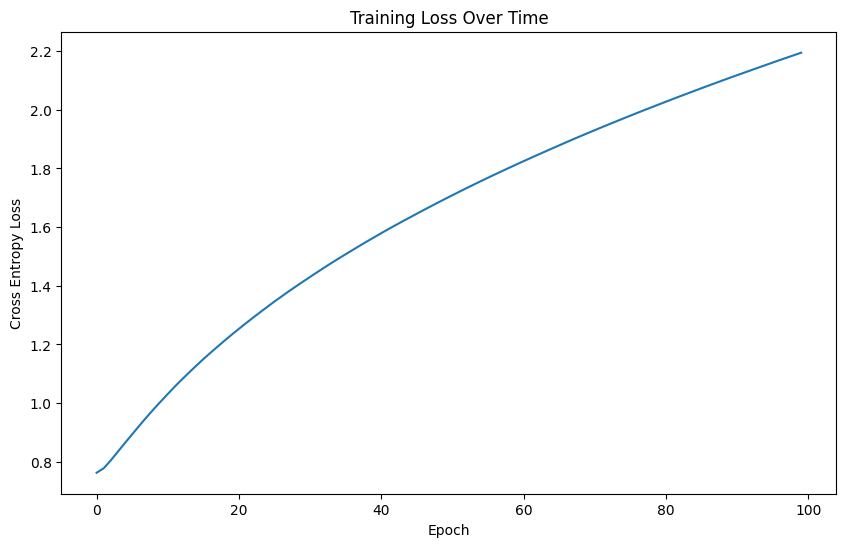

In [12]:
# Helper functions for activation and loss
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Neural Network class
class TwoLayerPerceptron:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2.0/input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2.0/hidden_size)
        self.b2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate
        
    def forward(self, X):
        # Forward pass
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2
    
    def backward(self, X, y, y_pred):
        m = X.shape[0]
        
        # Backward pass
        dz2 = y_pred - y.reshape(-1, 1)
        dW2 = (1/m) * np.dot(self.a1.T, dz2)
        db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True)
        
        da1 = np.dot(dz2, self.W2.T)
        dz1 = da1 * relu_derivative(self.z1)
        dW1 = (1/m) * np.dot(X.T, dz1)
        db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True)
        
        # Update weights and biases
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
    
    def train(self, X, y, batch_size=32, epochs=100):
        n_samples = X.shape[0]
        losses = []
        
        for epoch in range(epochs):
            # Shuffle data
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            
            # Mini-batch training
            for i in range(0, n_samples, batch_size):
                X_batch = X_shuffled[i:i + batch_size]
                y_batch = y_shuffled[i:i + batch_size]
                
                # Forward and backward passes
                y_pred = self.forward(X_batch)
                self.backward(X_batch, y_batch, y_pred)
                
            # Calculate loss for the epoch
            y_pred_all = self.forward(X)
            loss = cross_entropy_loss(y, y_pred_all)
            losses.append(loss)
            
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
                
        return losses
    
    def predict(self, X):
        y_pred = self.forward(X)
        return (y_pred > 0.5).astype(int)

# Initialize and train the model
input_size = X_train.shape[1]  # 2 features
hidden_size = 64  # Can be tuned
output_size = 1   # Binary classification

model = TwoLayerPerceptron(input_size, hidden_size, output_size, learning_rate=0.01)
losses = model.train(X_train, y_train, batch_size=32, epochs=100)

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.show()


In [14]:
from sklearn.metrics import classification_report
# Get predictions for train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Print classification reports
print("Training Set Classification Report:")
print(classification_report(y_train, y_train_pred))
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))


Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       387
           1       0.99      0.98      0.99       413

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800


Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        97
           1       1.00      0.99      1.00       103

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200

